In [2]:
import os
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import cv2
import json
import numpy as np


In [3]:
def image_feeder(data_path):
    n = 0
    filelist= [file for file in os.listdir(data_path) if file.endswith('.jpg')]
    for file in filelist:
        train_file_path = os.path.join(data_path, file)
        yield (file, cv2.imread(train_file_path, cv2.IMREAD_GRAYSCALE))

def show_img(image, cmap = "gray"):
    if cmap is None:
        plt.imshow(image)
    else: 
        plt.imshow(image, cmap=cmap)

def extract_statistics(image):
    mean = np.mean(image)
    std = np.std(image)
    return mean, std

def img_hist(data, title, y_label, x_label):
    bins = np.arange(0, 255, 5)
    plt.hist(data, bins=bins, alpha = 0.5)
    plt.xlim([min(data)-5, max(data)+5])
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()

In [4]:
data_path = "..\Track2\data\Console_sliced"
train_path = os.path.join(data_path, "train")
train_a_pth = os.path.join(train_path, "_annotations.coco.json")


In [5]:
with open(train_a_pth) as f:
    train_a = json.load(f)
print(train_a.keys())

dict_keys(['images', 'annotations', 'categories'])


In [6]:
print("Training data length:")
print(len(train_a["images"]))


Training data length:
2226


{'height': 800, 'width': 800, 'id': 1, 'file_name': '000000000000100147_2_4_TA07_02_20220107183037140_02_0_0_800_800.jpg'}
(800, 800)


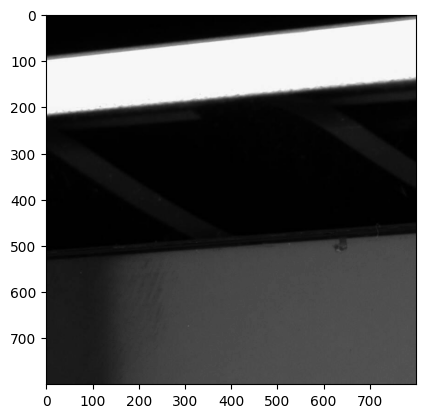

In [16]:
train_file_path = os.path.join(train_path, train_a["images"][0]["file_name"])
print(train_a["images"][0])
image = cv2.imread(train_file_path, cv2.IMREAD_GRAYSCALE)
print(image.shape)
show_img(image)

In [8]:
all_mean = []
all_std = []
for name, img in image_feeder(train_path):
    mean, std = extract_statistics(img)
    all_mean.append(mean)
    all_std.append(std)

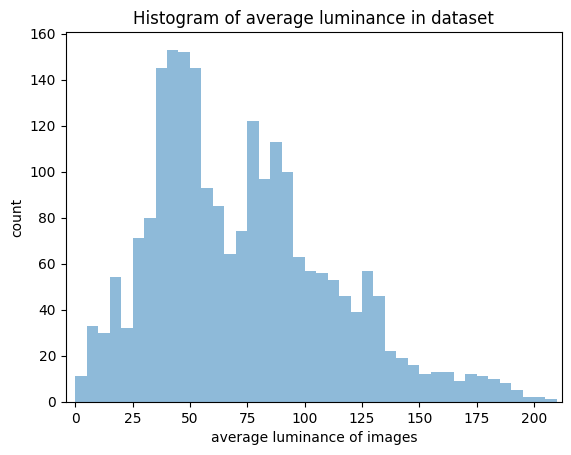

In [9]:

img_hist(all_mean, 'Histogram of average luminance in dataset', "count", "average luminance of images")


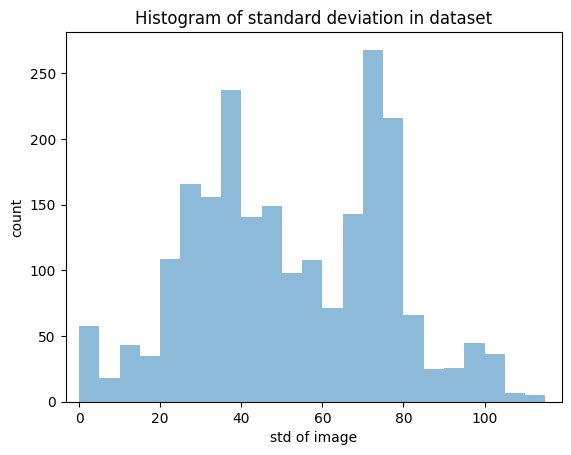

In [10]:
img_hist(all_std, "Histogram of standard deviation in dataset", "count", "std of image")

In [11]:
print(train_a["annotations"][0].keys())
print(train_a["annotations"][0]["segmentation"])

dict_keys(['iscrowd', 'image_id', 'bbox', 'segmentation', 'category_id', 'id', 'area'])
[[223, 525, 220, 525, 219, 526, 216, 526, 215, 527, 213, 527, 212, 528, 211, 528, 210, 529, 210, 532, 211, 533, 211, 539, 210, 540, 210, 541, 207, 544, 206, 544, 202, 548, 201, 548, 196, 553, 195, 553, 190, 558, 189, 558, 185, 562, 185, 563, 184, 564, 184, 565, 183, 566, 183, 567, 181, 569, 181, 570, 180, 571, 180, 572, 179, 573, 179, 574, 177, 576, 177, 577, 176, 578, 176, 579, 175, 580, 175, 581, 174, 582, 174, 584, 175, 585, 175, 587, 177, 589, 177, 590, 180, 593, 183, 593, 184, 594, 184, 597, 183, 598, 183, 600, 182, 601, 182, 602, 180, 604, 180, 605, 175, 610, 175, 611, 172, 614, 172, 615, 171, 616, 171, 617, 169, 619, 169, 620, 168, 621, 168, 622, 167, 623, 167, 629, 166, 630, 166, 648, 167, 649, 167, 679, 168, 680, 168, 688, 169, 689, 169, 692, 170, 693, 170, 696, 171, 697, 171, 702, 170, 703, 170, 707, 167, 710, 167, 711, 161, 717, 160, 717, 150, 727, 150, 728, 145, 733, 145, 734, 144, 735, 

1


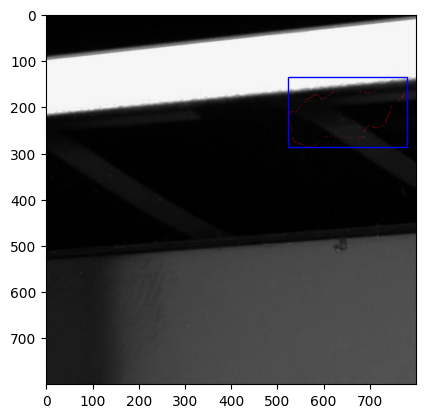

In [23]:
image_rgb = cv2.cvtColor(image,cv2.COLOR_GRAY2RGB)
segmentation = train_a["annotations"][0]["segmentation"][0]
print(train_a["annotations"][0]["image_id"])
bbox = train_a["annotations"][0]["bbox"]
f, ax = plt.subplots(1,1)
for n in range(int(len(segmentation)/2)):
    image_rgb[segmentation[2*n], segmentation[2*n+1], 0]=255
rect=mpatches.Rectangle((bbox[1],bbox[0]),bbox[3],bbox[2], 
                        fill = False,
                        color = "blue",
                        linewidth = 1)
ax.imshow(image_rgb)
ax.add_patch(rect)
plt.show()

[{'id': 0, 'name': 'Collision', 'supercategory': 'Collision'}, {'id': 1, 'name': 'Dirty', 'supercategory': 'Dirty'}, {'id': 2, 'name': 'Gap', 'supercategory': 'Gap'}, {'id': 3, 'name': 'Scratch', 'supercategory': 'Scratch'}]


<BarContainer object of 4 artists>

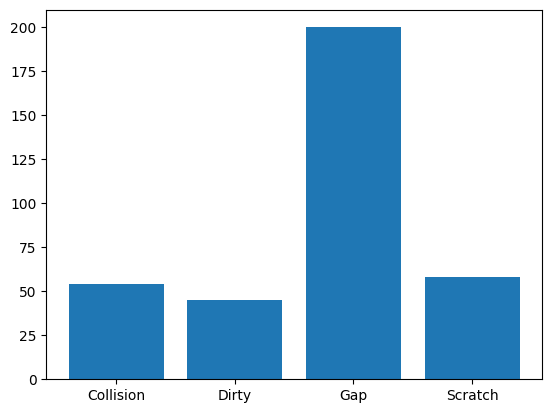

In [13]:
print(train_a["categories"])
names = ["Collision", "Dirty", "Gap", "Scratch"]
all_categories_count = {0:0, 1:0, 2:0, 3:0}
for example in train_a["annotations"]:
    all_categories_count[example["category_id"]] += 1
plt.bar(names, all_categories_count.values())

<BarContainer object of 2 artists>

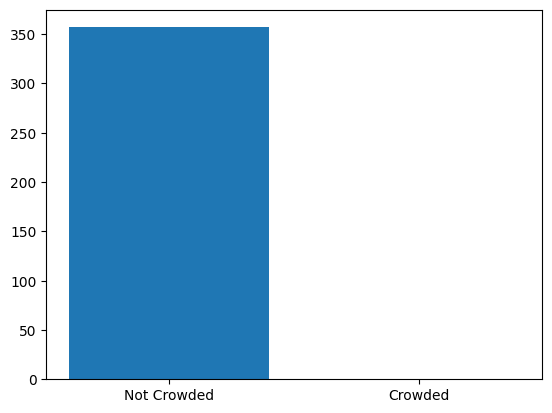

In [14]:
names = ["Not Crowded", "Crowded"]
all_iscrowd_count = {0:0, 1:0}
for example in train_a["annotations"]:
    all_iscrowd_count[example["iscrowd"]] += 1
plt.bar(names, all_iscrowd_count.values())